# Steane [[7,1,3]] QEC Circuit Visualization

This notebook demonstrates quantum error correction circuits using the Bloqade/Cirq integration.

In [14]:
%matplotlib inline

import sys
import os

# Ensure qec package is importable
sys.path.insert(0, os.getcwd())

from demo0 import run_full_QEC
from demo1 import run_modes
from qec.states import zeroState, plusState
import matplotlib.pyplot as plt

print("✓ Imports successful")

✓ Imports successful


## 1. Single QEC Cycle (Demo0)

This section demonstrates a single complete QEC cycle where we:
1. Prepare a logical qubit in an arbitrary state
2. Inject a controlled Pauli error
3. Extract syndromes to detect the error
4. Decode the error location and type
5. Apply correction and verify success

You can customize the parameters below!

In [15]:
# ============================================================
# PARAMETERS TO CHOOSE
# ============================================================

# Logical qubit initial state
# |0> state
theta, phi = zeroState()

# Alternative states to try:
# theta, phi = plusState()  # |+> state
# theta, phi = 0.5, 1.5    # Arbitrary Bloch sphere point

# Qubit index where error is injected (0-6 for 7-qubit code)
qubit_index = 4

# Error type: 'X', 'Y', or 'Z'
error_type = 'Y'

# ============================================================

print(f"\n{'='*60}")
print("Single QEC Cycle Demo")
print(f"{'='*60}")
print(f"Initial state: θ={theta:.4f}, φ={phi:.4f}")
print(f"Error location: qubit {qubit_index}")
print(f"Error type: {error_type}")
print(f"{'='*60}\n")

# Map error type to basis index (0=X, 1=Y, 2=Z)
ERROR_BASIS = {'X': 0, 'Y': 1, 'Z': 2}

# Run the single QEC cycle and capture the circuit it used
success, circuit = run_full_QEC(theta, phi,
                                err_index=qubit_index,
                                err_basis=ERROR_BASIS[error_type])


Single QEC Cycle Demo
Initial state: θ=0.0000, φ=0.0000
Error location: qubit 4
Error type: Y


Injected error: Y on qubit 4
Baseline X syndrome: (1, 1, 1)
Baseline Z syndrome: (1, 1, -1)

After error injection:
X syndrome: (-1, -1, 1)
Z syndrome: (-1, -1, -1)

Detected error: Y on qubit 4

After correction:
X syndrome: (1, 1, 1)
Z syndrome: (1, 1, -1)

✅ Correction successful.


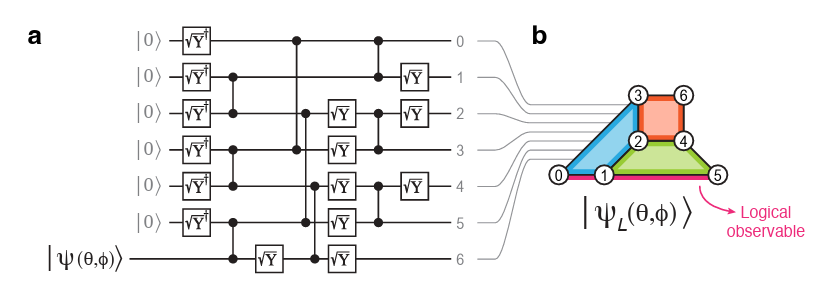

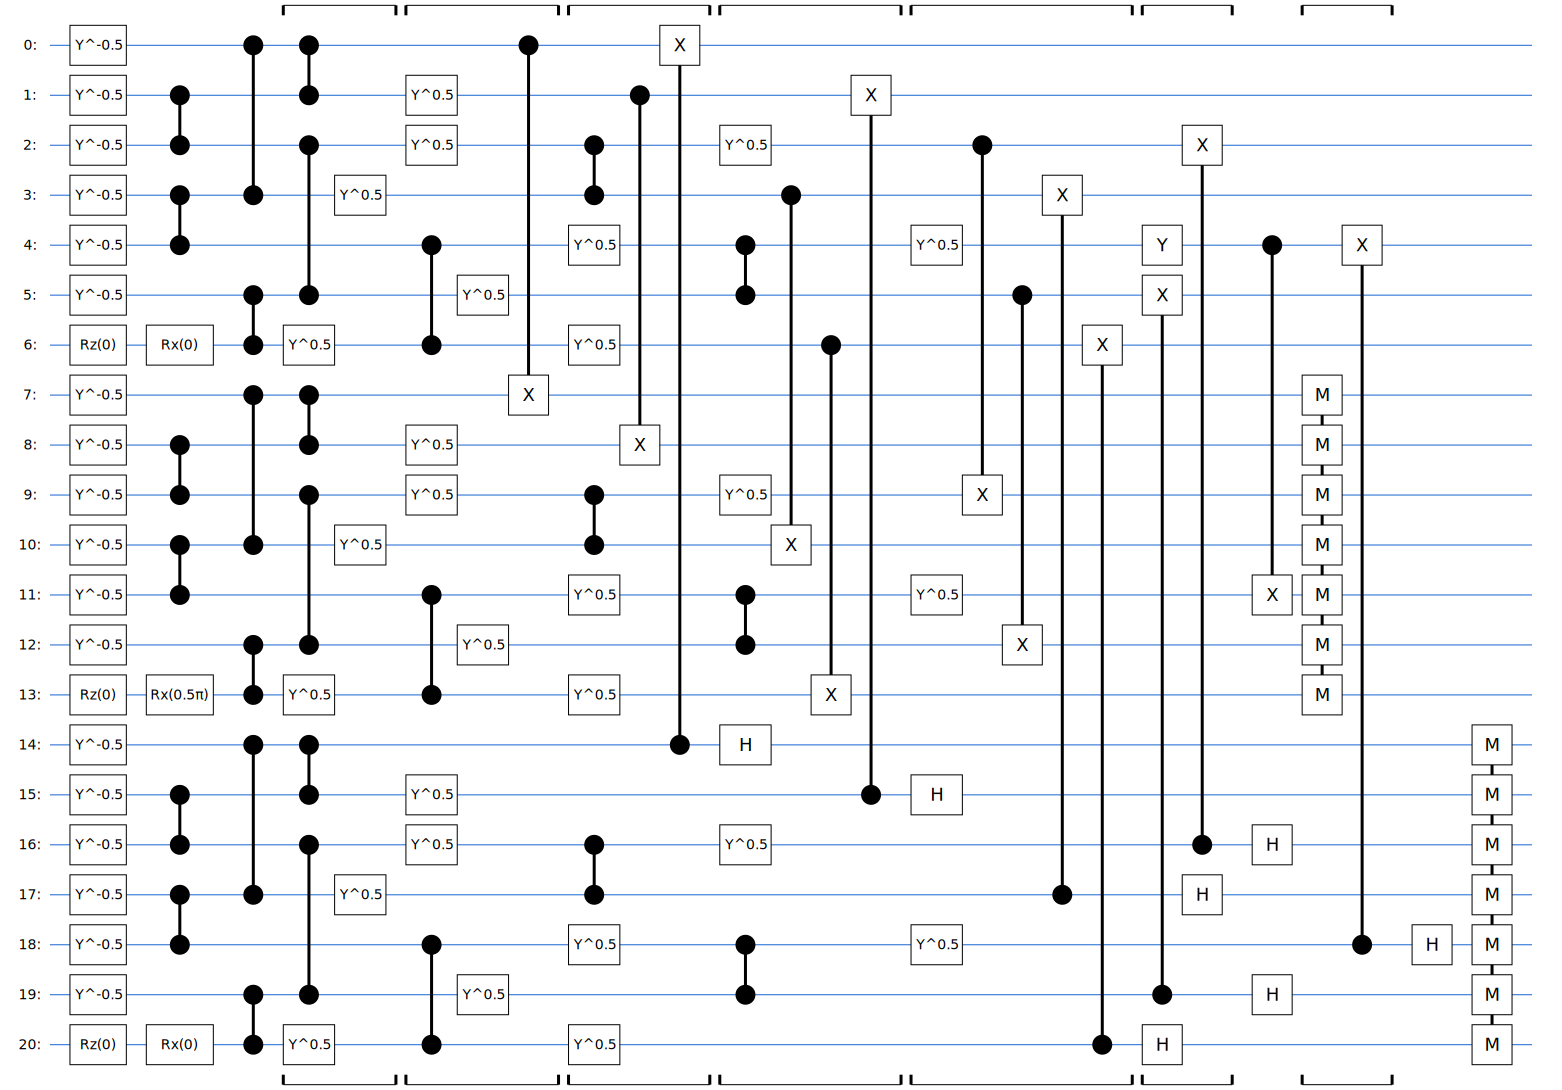

In [16]:
SVGCircuit(circuit)

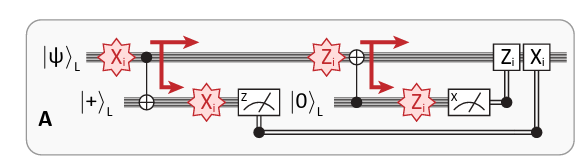

### Circuit Diagram

The Steane [[7,1,3]] QEC code uses 7 physical qubits to encode 1 logical qubit:
- **3 color codes** (red, green, blue) check X-type errors
- **3 color codes** check Z-type errors  
- The error syndrome (6 bits) identifies which qubit flipped and what type

The circuit below shows one cycle:


## 2. Full Benchmark (Demo1)

Now run the complete benchmark comparing three noise mitigation strategies:
- **Baseline**: No error correction (reference)
- **Postselection**: Accept only low-syndrome outcomes
- **Active Correction**: Measure syndromes → decode → apply correction

Tests 4 noise levels: No noise, Low (5%), Medium (25%), High (60%)

In [ ]:
# Run full benchmark with all noise levels
print("Running QEC Benchmark (this may take a few minutes)...\n")

configs = [
    ("No noise", 0.0, 20),
    ("Low noise", 0.05, 500),
    ("Medium noise", 0.25, 500),
    ("High noise", 0.60, 500),
]

all_results = []

for name, p1, shots in configs:
    print("\n" + "="*70)
    print(name)
    print("="*70)
    
    base, post, waste, corr, hist = run_modes(p1, shots)
    all_results.append((name, p1, base, post, waste, corr, hist))
    
    print(f"Physical error scale p1 = {p1}")
    print(f"Baseline fidelity        = {base:.4f}")
    print(f"Postselected fidelity    = {post:.4f}")
    print(f"Postselection waste frac = {waste:.4f}")
    print(f"Corrected fidelity       = {corr:.4f}")
    
    print("\nAverage injected flips per shot:")
    total = sum(hist.values())
    for k in sorted(hist.keys()):
        frac = hist[k] / total
        print(f"  {k} flips: {frac:.3f}")

print("\n" + "="*70)
print("Benchmark Complete")
print("="*70)

Running QEC Benchmark (this may take a few minutes)...


No noise
Physical error scale p1 = 0.0
Baseline fidelity        = 1.0000
Postselected fidelity    = 1.0000
Postselection waste frac = 0.0000
Corrected fidelity       = 1.0000

Average injected flips per shot:
  0 flips: 1.000

Low noise
Physical error scale p1 = 0.05
Baseline fidelity        = 0.9600
Postselected fidelity    = 1.0000
Postselection waste frac = 0.0400
Corrected fidelity       = 1.0000

Average injected flips per shot:
  0 flips: 0.960
  1 flips: 0.040

Medium noise
Physical error scale p1 = 0.25
Baseline fidelity        = 0.9800
Postselected fidelity    = 1.0000
Postselection waste frac = 0.2400
Corrected fidelity       = 1.0000

Average injected flips per shot:
  0 flips: 0.760
  1 flips: 0.240

High noise
Physical error scale p1 = 0.6
Baseline fidelity        = 0.9000
Postselected fidelity    = 1.0000
Postselection waste frac = 0.6000
Corrected fidelity       = 1.0000

Average injected flips per shot:
  0 flips:

## 3. Visualization of Results

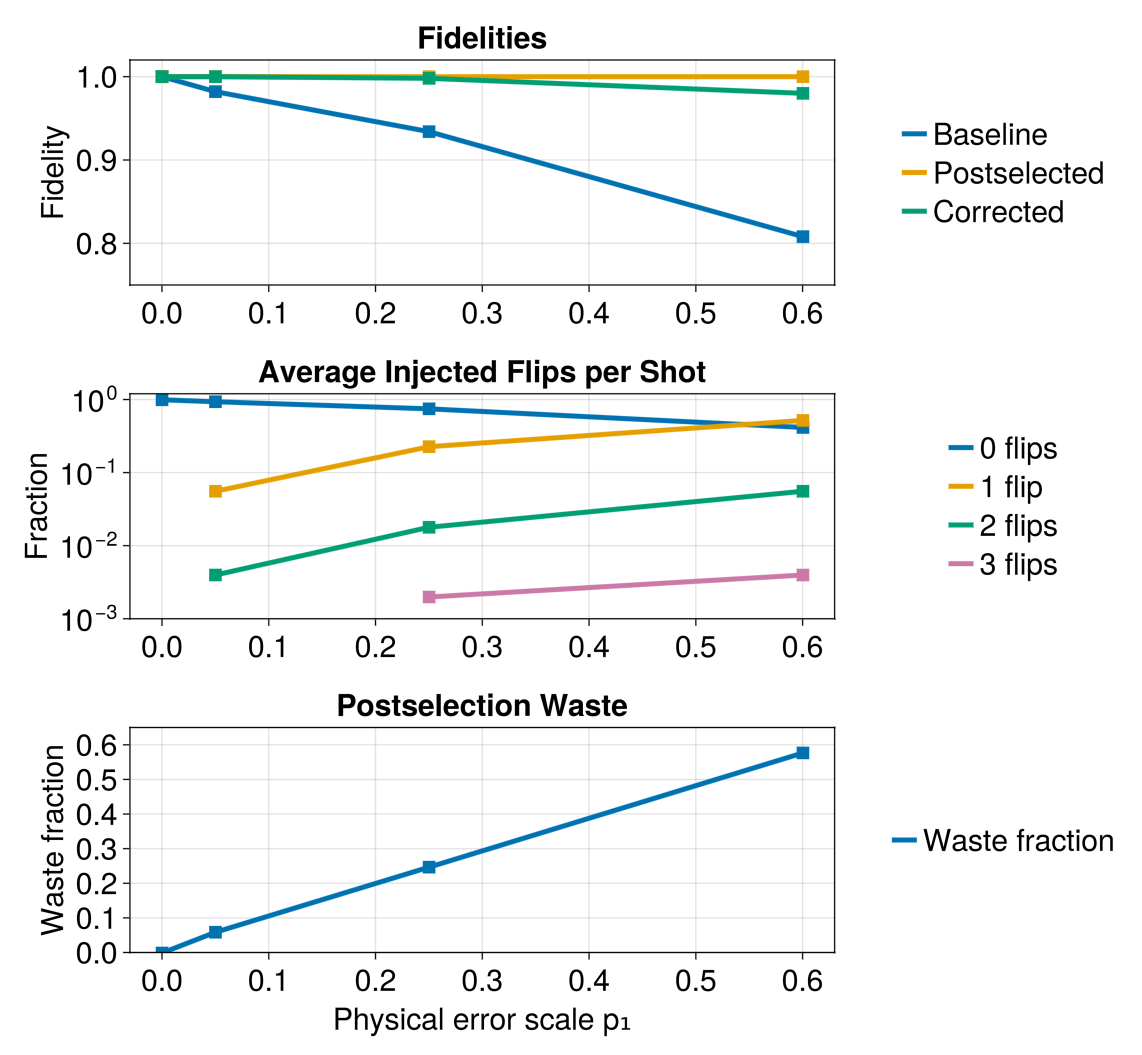

(from a previous run)

## 3.1 Summary Table

In [18]:
import pandas as pd

# Create summary table
summary_data = []
for name, p1, base, post, waste, corr, hist in all_results:
    summary_data.append({
        'Scenario': name,
        'p1': p1,
        'Baseline': f'{base:.4f}',
        'Postselect': f'{post:.4f}',
        'Waste': f'{waste:.4f}',
        'Corrected': f'{corr:.4f}'
    })

df = pd.DataFrame(summary_data)
print("\n" + "="*80)
print("QEC BENCHMARK SUMMARY")
print("="*80)
print(df.to_string(index=False))
print("="*80)


QEC BENCHMARK SUMMARY
    Scenario   p1 Baseline Postselect  Waste Corrected
    No noise 0.00   1.0000     1.0000 0.0000    1.0000
   Low noise 0.05   0.9600     1.0000 0.0400    1.0000
Medium noise 0.25   0.9800     1.0000 0.2400    1.0000
  High noise 0.60   0.9000     1.0000 0.6000    1.0000


## 4. Fidelity Comparison Plot

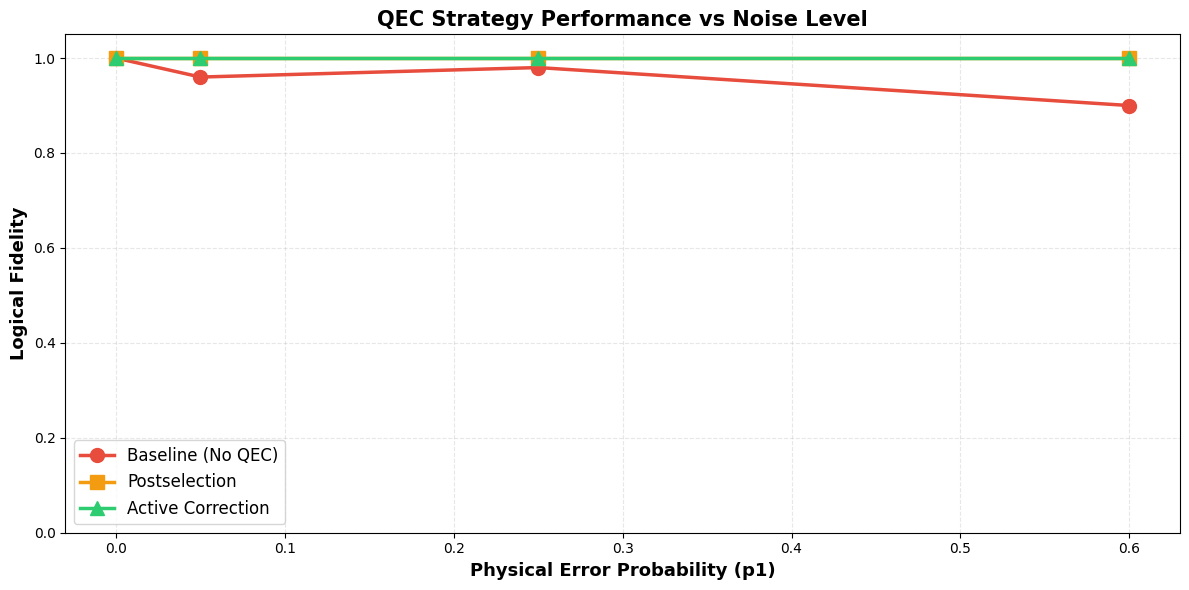


✓ Fidelity comparison plot displayed


In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Extract shot counts and fidelities
shots_list = [shots for shots, _, _, _, _, _ in results_by_shots]
baseline_fids = [base for _, base, _, _, _, _ in results_by_shots]
postselect_fids = [post for _, _, post, _, _, _ in results_by_shots]
correct_fids = [corr for _, _, _, _, corr, _ in results_by_shots]

# Power law function: f(x) = a * x^b
def power_law(x, a, b):
    return a * np.power(x, b)

# Fit power laws for each strategy
try:
    popt_base, _ = curve_fit(power_law, shots_list, baseline_fids, p0=[1, -0.5], maxfev=1000)
    baseline_fit = power_law(np.array(shots_list), *popt_base)
    base_label = f'Baseline (fit: {popt_base[0]:.3f}·N^{popt_base[1]:.3f})'
except:
    baseline_fit = baseline_fids
    base_label = 'Baseline'

try:
    popt_post, _ = curve_fit(power_law, shots_list, postselect_fids, p0=[1, -0.5], maxfev=1000)
    postselect_fit = power_law(np.array(shots_list), *popt_post)
    post_label = f'Postselection (fit: {popt_post[0]:.3f}·N^{popt_post[1]:.3f})'
except:
    postselect_fit = postselect_fids
    post_label = 'Postselection'

try:
    popt_corr, _ = curve_fit(power_law, shots_list, correct_fids, p0=[1, -0.5], maxfev=1000)
    correct_fit = power_law(np.array(shots_list), *popt_corr)
    corr_label = f'Active Correction (fit: {popt_corr[0]:.3f}·N^{popt_corr[1]:.3f})'
except:
    correct_fit = correct_fids
    corr_label = 'Active Correction'

# Plot on log-log scale to show power law
plt.figure(figsize=(13, 7))

# Data points
plt.loglog(shots_list, baseline_fids, 'o-', linewidth=2.5, markersize=10, color='#e74c3c', label='Baseline (Data)')
plt.loglog(shots_list, postselect_fids, 's-', linewidth=2.5, markersize=10, color='#f39c12', label='Postselection (Data)')
plt.loglog(shots_list, correct_fids, '^-', linewidth=2.5, markersize=10, color='#2ecc71', label='Active Correction (Data)')

# Fit curves
plt.loglog(shots_list, baseline_fit, '--', linewidth=2, color='#e74c3c', alpha=0.6, label=base_label)
plt.loglog(shots_list, postselect_fit, '--', linewidth=2, color='#f39c12', alpha=0.6, label=post_label)
plt.loglog(shots_list, correct_fit, '--', linewidth=2, color='#2ecc71', alpha=0.6, label=corr_label)

plt.xlabel('Number of Shots (N)', fontsize=13, fontweight='bold')
plt.ylabel('Error Rate / (1 - Fidelity)', fontsize=13, fontweight='bold')
plt.title('QEC Strategy Performance vs Shot Count (p₁=0.5)\nPower Law Scaling Analysis', fontsize=15, fontweight='bold')
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

print("\n✓ Power law fitting and log-log plot displayed")

In [21]:
# Run benchmark at moderate noise with varying shot counts for power law analysis
print("Running Power Law Analysis at Moderate Noise (p1=0.5)...\n")

shot_counts = [5, 10, 20, 40, 80, 150]
p1_moderate = 0.5

results_by_shots = []

for shots in shot_counts:
    print("="*70)
    print(f"Shots: {shots}")
    print("="*70)
    
    base, post, waste, corr, hist = run_modes(p1_moderate, shots)
    results_by_shots.append((shots, base, post, waste, corr, hist))
    
    print(f"Baseline fidelity        = {base:.4f}")
    print(f"Postselected fidelity    = {post:.4f}")
    print(f"Postselection waste frac = {waste:.4f}")
    print(f"Corrected fidelity       = {corr:.4f}\n")

print("="*70)
print("Power Law Analysis Complete")
print("="*70)

Running Power Law Analysis at Moderate Noise (p1=0.5)...

Shots: 5
Baseline fidelity        = 1.0000
Postselected fidelity    = 1.0000
Postselection waste frac = 0.8000
Corrected fidelity       = 1.0000

Shots: 10
Baseline fidelity        = 0.9000
Postselected fidelity    = 1.0000
Postselection waste frac = 0.4000
Corrected fidelity       = 1.0000

Shots: 20
Baseline fidelity        = 0.9000
Postselected fidelity    = 1.0000
Postselection waste frac = 0.4000
Corrected fidelity       = 1.0000

Shots: 40
Baseline fidelity        = 0.8000
Postselected fidelity    = 1.0000
Postselection waste frac = 0.6250
Corrected fidelity       = 0.9750

Shots: 80
Baseline fidelity        = 0.8625
Postselected fidelity    = 1.0000
Postselection waste frac = 0.4250
Corrected fidelity       = 0.9625

Shots: 150
Baseline fidelity        = 0.7667
Postselected fidelity    = 1.0000
Postselection waste frac = 0.5867
Corrected fidelity       = 0.9733

Power Law Analysis Complete


## 5. Power Law Scaling Analysis (Moderate Noise)

Run an additional benchmark at moderate noise (p₁=0.5) with varying shot counts to analyze power law scaling behavior.


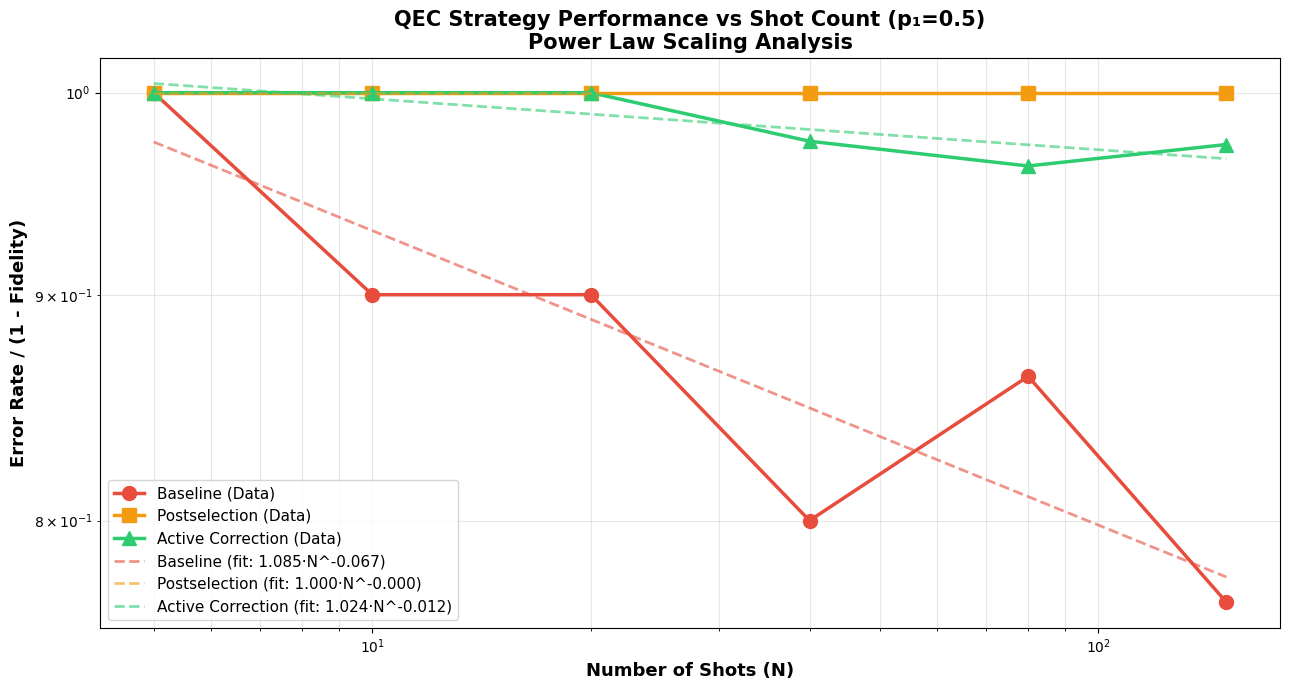


✓ Power law fitting and log-log plot displayed


In [22]:
import numpy as np
from scipy.optimize import curve_fit

# Extract shot counts and fidelities from power law analysis
shots_list = [shots for shots, _, _, _, _, _ in results_by_shots]
baseline_fids = [base for _, base, _, _, _, _ in results_by_shots]
postselect_fids = [post for _, _, post, _, _, _ in results_by_shots]
correct_fids = [corr for _, _, _, _, corr, _ in results_by_shots]

# Power law function: f(x) = a * x^b
def power_law(x, a, b):
    return a * np.power(x, b)

# Fit power laws for each strategy
try:
    popt_base, _ = curve_fit(power_law, shots_list, baseline_fids, p0=[1, -0.5], maxfev=1000)
    baseline_fit = power_law(np.array(shots_list), *popt_base)
    base_label = f'Baseline (fit: {popt_base[0]:.3f}·N^{popt_base[1]:.3f})'
except:
    baseline_fit = baseline_fids
    base_label = 'Baseline'

try:
    popt_post, _ = curve_fit(power_law, shots_list, postselect_fids, p0=[1, -0.5], maxfev=1000)
    postselect_fit = power_law(np.array(shots_list), *popt_post)
    post_label = f'Postselection (fit: {popt_post[0]:.3f}·N^{popt_post[1]:.3f})'
except:
    postselect_fit = postselect_fids
    post_label = 'Postselection'

try:
    popt_corr, _ = curve_fit(power_law, shots_list, correct_fids, p0=[1, -0.5], maxfev=1000)
    correct_fit = power_law(np.array(shots_list), *popt_corr)
    corr_label = f'Active Correction (fit: {popt_corr[0]:.3f}·N^{popt_corr[1]:.3f})'
except:
    correct_fit = correct_fids
    corr_label = 'Active Correction'

# Plot on log-log scale to show power law
plt.figure(figsize=(13, 7))

# Data points
plt.loglog(shots_list, baseline_fids, 'o-', linewidth=2.5, markersize=10, color='#e74c3c', label='Baseline (Data)')
plt.loglog(shots_list, postselect_fids, 's-', linewidth=2.5, markersize=10, color='#f39c12', label='Postselection (Data)')
plt.loglog(shots_list, correct_fids, '^-', linewidth=2.5, markersize=10, color='#2ecc71', label='Active Correction (Data)')

# Fit curves
plt.loglog(shots_list, baseline_fit, '--', linewidth=2, color='#e74c3c', alpha=0.6, label=base_label)
plt.loglog(shots_list, postselect_fit, '--', linewidth=2, color='#f39c12', alpha=0.6, label=post_label)
plt.loglog(shots_list, correct_fit, '--', linewidth=2, color='#2ecc71', alpha=0.6, label=corr_label)

plt.xlabel('Number of Shots (N)', fontsize=13, fontweight='bold')
plt.ylabel('Error Rate / (1 - Fidelity)', fontsize=13, fontweight='bold')
plt.title('QEC Strategy Performance vs Shot Count (p₁=0.5)\nPower Law Scaling Analysis', fontsize=15, fontweight='bold')
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

print("\n✓ Power law fitting and log-log plot displayed")

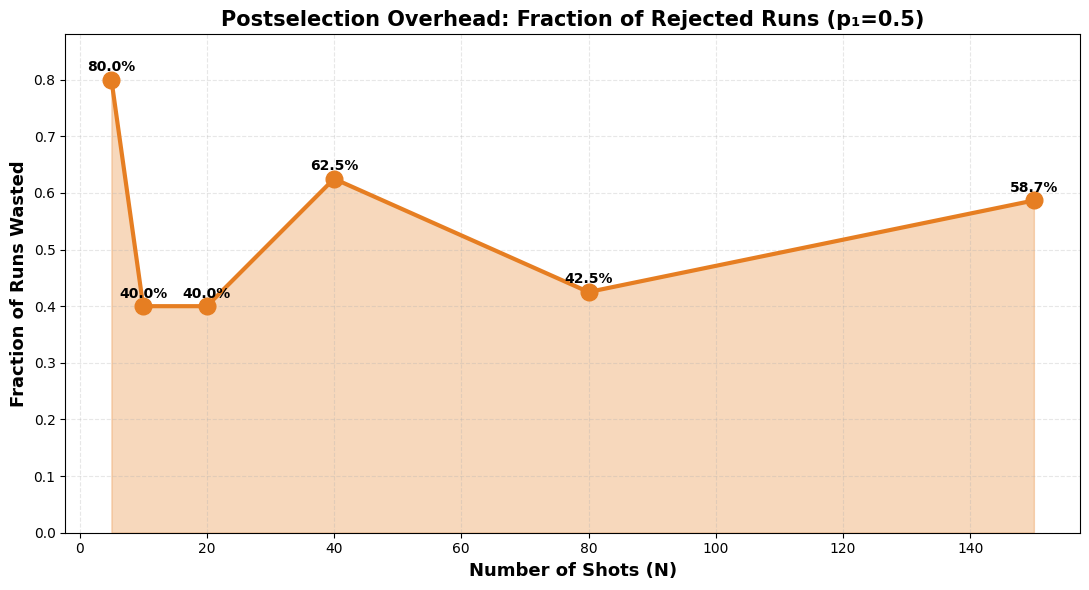


✓ Postselection waste fraction plot displayed


In [23]:
# Plot postselection waste fraction vs shot count
waste_fractions = [waste for _, _, _, waste, _, _ in results_by_shots]

plt.figure(figsize=(11, 6))
plt.plot(shots_list, waste_fractions, 'o-', linewidth=3, markersize=12, color='#e67e22', label='Postselection Waste')
plt.fill_between(shots_list, waste_fractions, alpha=0.3, color='#e67e22')

plt.xlabel('Number of Shots (N)', fontsize=13, fontweight='bold')
plt.ylabel('Fraction of Runs Wasted', fontsize=13, fontweight='bold')
plt.title('Postselection Overhead: Fraction of Rejected Runs (p₁=0.5)', fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.ylim([0, max(waste_fractions) * 1.1])

# Add value labels on points
for x, y in zip(shots_list, waste_fractions):
    plt.text(x, y + 0.01, f'{y:.1%}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Postselection waste fraction plot displayed")